# SCRAPING STOCK HEADLINE NEWS AND SENTIMENT ANALYSIS 

**Problem Description**

Stock markets tend to react very quickly to breaking news. Negative news will cause people to sell stocks and otherwise. By analyzing the sentiment/attitude toward stocks from news articles, social media, or financial reports, investors can extract insights and make data-driven decisions about whether to buy or sell a stock. 

In this project, we will scrape headline news from the financial website www.cnbc.com for three big stocks AMAZON,TESLA, and APPLE. Then we perform sentiment analysis based on scraped headline data to determine sentiment toward stock is positive, neutral, or negative. 

**Business Objectives:** Scraping Headline News and Performing Sentiment Analysis

**Data Source:** https://www.cnbc.com/

**Data Mining Method:** Selenium package and NLTK package are used for data scraping and sentiment analysis respecitively.

**Scraping Data**

Selenium is an amazing package that we can use to extract content from websites. Instead of copying and pasting every headline manually, we can parse website links and extract information quickly in a few lines of code.

In [1]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import os
import logging

In [2]:
#Function to scrape news about stocks on CNBC website
def scrape_news(stock):
    browser = webdriver.Chrome(ChromeDriverManager().install())
    cnbc_url = "https://www.cnbc.com/search/?query="
    stock = stock
    browser.get(cnbc_url + stock)
    #keep the browser
    time.sleep(45)
    headline = browser.find_elements(by=By.CLASS_NAME, value='SearchResult-searchResultPreview')
    headline_date = browser.find_elements(by=By.CLASS_NAME, value='SearchResult-publishedDate')
    #convert headline to list and create dataframe
    headline_list = [x.text for x in headline]
    headline_date_list = [x.text for x in headline_date]
    df = pd.DataFrame({'headline': headline_list, 'date': headline_date_list})
    return df

In [3]:
#Scrape news for Mettler Toledo
df_MT = scrape_news('Mettler Toledo')
df_MT['company'] = 'Mettler Toledo'
df_MT.head()

[WDM] - Downloading: 100%|██████████| 6.58M/6.58M [00:00<00:00, 7.16MB/s]
C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\1663941962.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install())


,headline,date,company
0,"With the markets hovering around record highs,...",5/5/2021 7:01:58 PM,Mettler Toledo
1,The giants of the internet economy are typical...,9/20/2017 2:21:53 PM,Mettler Toledo
2,CNBC’s Jim Cramer hails Bob Iger’s leadership ...,11/14/2019 1:34:07 AM,Mettler Toledo
3,Coca-Cola: ”[CEO] James Quincey’s doing a darn...,11/14/2019 12:50:59 AM,Mettler Toledo
4,"The current stock market, highly volatile and ...",3/23/2022 2:00:01 PM,Mettler Toledo


In [4]:
#Scrape news for MCK
df_MCK = scrape_news('Mckesson')
df_MCK['company'] = 'MCK'
df_MCK.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\1663941962.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install())


,headline,date,company
0,The “Halftime Report” traders give their top p...,6/30/2022 6:21:48 PM,MCK
1,The Supreme Court on Monday sided with promine...,11/2/2020 4:41:42 PM,MCK
2,Take a look at some of the biggest movers in t...,5/20/2020 12:49:19 PM,MCK
3,The Food and Drug Administration said Tuesday ...,2/12/2019 4:07:00 PM,MCK
4,Drug distributor McKesson has agreed to pay $3...,5/2/2019 5:21:03 PM,MCK


In [5]:
#Scrape news for LH
df_LH = scrape_news('Laboratory Corporation')
df_LH['company'] = 'LH'
df_LH.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\1663941962.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install())


,headline,date,company
0,"Novo Nordisk A/S: “Other than appreciation, I ...",12/13/2022 1:26:11 AM,LH
1,Shares of Laboratory Corporation of America Ho...,2/6/2017 10:36:48 PM,LH
2,As Wall Street enters its fourth-straight week...,9/7/2022 3:17:22 PM,LH
3,Even though the broader stock market is tradin...,10/12/2015 6:40:46 PM,LH
4,Diagnostics testing company Laboratory Corpora...,7/28/2020 12:09:29 PM,LH


In [6]:
#Scrape news for Cummins
df_CMI = scrape_news('Cummins')
df_CMI['company'] = 'Cummins'
df_CMI.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\1663941962.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install())


,headline,date,company
0,"Jennifer Rumsey, Cummins president and CEO, jo...",12/8/2022 4:33:41 PM,Cummins
1,Cramer answered callers’ investing questions a...,10/26/2022 12:18:35 AM,Cummins
2,"Jennifer Rumsey, Cummins CEO, joins ‘Squawk on...",8/4/2022 4:21:16 PM,Cummins
3,CNBC’s Jim Cramer joins ‘Squawk on the Street’...,7/20/2022 5:25:42 PM,Cummins
4,"Drugmaker Eli Lilly, one of the biggest employ...",8/6/2022 8:46:55 PM,Cummins


In [7]:
#Scrape news for MLM
df_MLM = scrape_news('Martin Marietta')
df_MLM['company'] = 'MLM'
df_MLM.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\1663941962.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install())


,headline,date,company
0,"Ayako Yoshioka, Wealth Enhancement Group senio...",9/13/2022 10:04:30 PM,MLM
1,Expect Vulcan Materials to outperform as its v...,12/8/2022 1:03:04 PM,MLM
2,Martin Marietta Materials CEO Ward Nye was opt...,3/2/2021 12:41:21 AM,MLM
3,Martin Marietta Chairman and CEO Ward Nye join...,5/25/2021 1:03:38 AM,MLM
4,Martin Marietta Chairman and CEO Ward Nye told...,5/25/2021 12:55:30 AM,MLM


In [10]:
#combine all dataframes
df = pd.concat([df_MLM,df_MT,df_CMI,df_LH,df_MCK], ignore_index=True)

#drop duplicates
df.drop_duplicates(subset ="headline", keep = False, inplace = True)

In [11]:
#df.to_csv('news.csv', index=False)
df.head()

,headline,date,company
0,"Ayako Yoshioka, Wealth Enhancement Group senio...",9/13/2022 10:04:30 PM,MLM
1,Expect Vulcan Materials to outperform as its v...,12/8/2022 1:03:04 PM,MLM
2,Martin Marietta Materials CEO Ward Nye was opt...,3/2/2021 12:41:21 AM,MLM
3,Martin Marietta Chairman and CEO Ward Nye join...,5/25/2021 1:03:38 AM,MLM
4,Martin Marietta Chairman and CEO Ward Nye told...,5/25/2021 12:55:30 AM,MLM


In [12]:
#Remove the special characters from the headline (apart from a-z and A-Z replace everything with blank)
df['headline'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)

#convert headline to lower case and string
df['headline'] = df['headline'].str.lower()
df['headline'] = df['headline'].astype(str)

df.dropna(inplace=True)

# split date column in date and time
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date

df.head()

,headline,date,company
0,ayako yoshioka wealth enhancement group senio...,2022-09-13,MLM
1,expect vulcan materials to outperform as its v...,2022-12-08,MLM
2,martin marietta materials ceo ward nye was opt...,2021-03-02,MLM
3,martin marietta chairman and ceo ward nye join...,2021-05-25,MLM
4,martin marietta chairman and ceo ward nye told...,2021-05-25,MLM


In [13]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtypes

dtype('<M8[ns]')

In [19]:
#save df to csv
df.to_csv('news.csv', index=False)

**SENTIMENT ANALYSIS**

Sentiment analysis is a natural language processing (NLP) technique used to determine whether data is positive, negative, or neutral. This technique is used to discover the meaning behind texts, images or other types of data. The sentiment score ranges from 0 to 1. The higher the score the more positive the data. This project uses NLTK package to calculate sentiment score of each headline then visualizes by bar plot

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#sentiment score for each headline
vader = SentimentIntensityAnalyzer()
scores = df['headline'].apply(vader.polarity_scores).tolist()
#convert scores to dataframe
scores_df = pd.DataFrame(scores)
#join scores to original dataframe
df = df.join(scores_df, rsuffix='_right')

df.head()

,headline,date,company,neg,neu,pos,compound
0,ayako yoshioka wealth enhancement group senio...,2022-09-13,MLM,0.000,0.882,0.118,0.4939
1,expect vulcan materials to outperform as its v...,2022-12-08,MLM,0.000,0.822,0.178,0.6369
2,martin marietta materials ceo ward nye was opt...,2021-03-02,MLM,0.000,0.836,0.164,0.5423
3,martin marietta chairman and ceo ward nye join...,2021-05-25,MLM,0.118,0.882,0.000,-0.4939
4,martin marietta chairman and ceo ward nye told...,2021-05-25,MLM,0.000,0.909,0.091,0.3400


In [15]:
#replace company name with ticker
df['company'] = df['company'].replace({'Mettler Toledo':'MTD','Cummins':'CMI'})

df.head()

,headline,date,company,neg,neu,pos,compound
0,ayako yoshioka wealth enhancement group senio...,2022-09-13,MLM,0.000,0.882,0.118,0.4939
1,expect vulcan materials to outperform as its v...,2022-12-08,MLM,0.000,0.822,0.178,0.6369
2,martin marietta materials ceo ward nye was opt...,2021-03-02,MLM,0.000,0.836,0.164,0.5423
3,martin marietta chairman and ceo ward nye join...,2021-05-25,MLM,0.118,0.882,0.000,-0.4939
4,martin marietta chairman and ceo ward nye told...,2021-05-25,MLM,0.000,0.909,0.091,0.3400


In [16]:
#filter data for 2021
from datetime import datetime
startdate = datetime.strptime("2021-01-01", "%Y-%m-%d")
enddate = datetime.strptime("2021-12-31", "%Y-%m-%d")
data = df[(df['date'] >= startdate) & (df['date'] <= enddate)]
data['date'] = data['date'].dt.strftime('%d-%b-%Y')
#add month column
data['month'] = pd.to_datetime(data['date']).dt.month
data = data.groupby(['month', 'company']).mean().reset_index()
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\3870454834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].dt.strftime('%d-%b-%Y')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\3870454834.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.to_datetime(data['date']).dt.month
C:\Users\DELL\AppData\Local\Temp\ipykernel_14300\3870454834.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

,month,company,neg,neu,pos,compound
0,1,CMI,0.138,0.791000,0.071000,-0.401900
1,1,MCK,0.080,0.839333,0.080333,-0.005967
2,1,MLM,0.133,0.738000,0.129000,-0.025800
3,1,MTD,0.000,0.956000,0.044000,0.025800
4,2,CMI,0.115,0.885000,0.000000,-0.296000


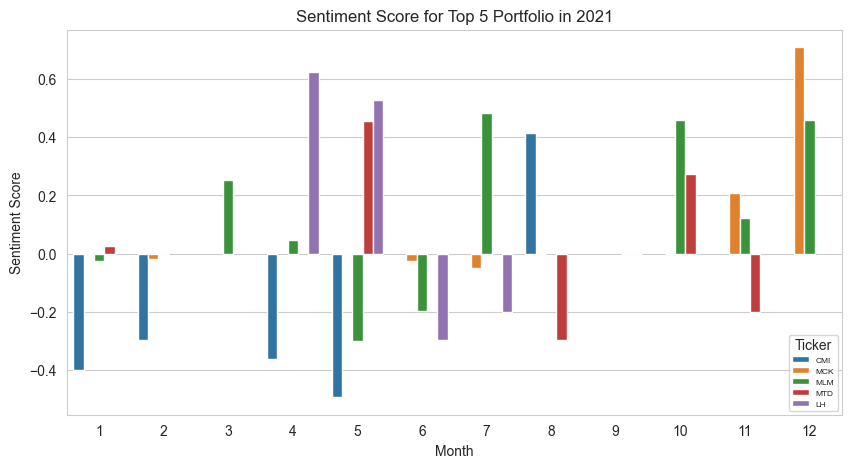

In [18]:
#plot sentiment score
import warnings
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='compound', data=data, hue ='company')
warnings.filterwarnings('ignore')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.legend(loc='lower right', fontsize=6, title='Ticker')
plt.title('Sentiment Score for Top 5 Portfolio in 2021')
sns.set_style("whitegrid", {'axes.grid' : False})
